In [1]:
#Van Rodolf Suliva
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_ind


file_path = 'biology_students.csv'
data = pd.read_csv(file_path)

/tmp/ipykernel_125/2812974509.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Academic_Performance_Score'], shade=True, color="skyblue")


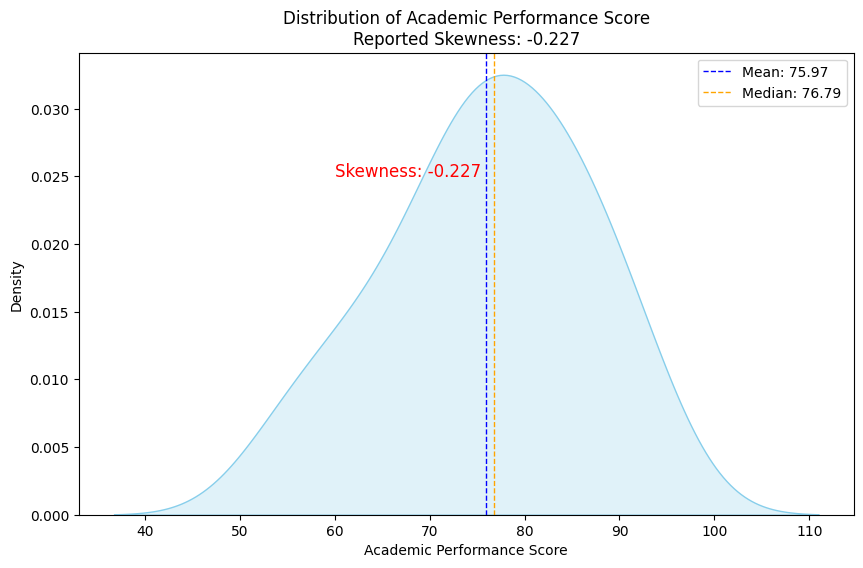

In [2]:
mean = 75.97
median = 76.79
std_dev = 10.90
plt.figure(figsize=(10, 6))
sns.kdeplot(data['Academic_Performance_Score'], shade=True, color="skyblue")


plt.axvline(data['Academic_Performance_Score'].mean(), color='blue', linestyle='dashed', linewidth=1, label=f'Mean: {mean}')


plt.axvline(data['Academic_Performance_Score'].median(), color='orange', linestyle='dashed', linewidth=1, label=f'Median: {median}')


plt.text(x=60, y=0.025, s=f'Skewness: -0.227', fontsize=12, color='red')

plt.title(f'Distribution of Academic Performance Score\nReported Skewness: -0.227')
plt.xlabel('Academic Performance Score')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


In [3]:

#Basic Measures of Central Tendency of the Population Data 

def format_statistics(stats):
    return {key: round(value, 3) for key, value in stats.items()}

def compute_statistics(series):
    """Compute mean, median, mode, and range of a pandas Series."""
    mean = series.mean()
    median = series.median()
    mode = series.mode()[0]  
    range_val = series.max() - series.min()
    return mean, median, mode, range_val


gwa_stats_formatted = format_statistics(dict(zip(['Mean', 'Median', 'Mode', 'Range'], compute_statistics(data['GWA']))))
academic_performance_stats_formatted = format_statistics(dict(zip(['Mean', 'Median', 'Mode', 'Range'], compute_statistics(data['Academic_Performance_Score']))))
sleep_hours_stats_formatted = format_statistics(dict(zip(['Mean', 'Median', 'Mode', 'Range'], compute_statistics(data['Sleep_Hours']))))


mean_school_start_time_hours = data['School_Start_Time'].mean() / 60
median_school_start_time_hours = data['School_Start_Time'].median() / 60
mode_school_start_time_hours = data['School_Start_Time'].mode().iloc[0] / 60 
range_school_start_time_hours = (data['School_Start_Time'].max() - data['School_Start_Time'].min()) / 60

school_start_time_stats_formatted = format_statistics({
    'Mean (hours)': mean_school_start_time_hours,
    'Median (hours)': median_school_start_time_hours,
    'Mode (hours)': mode_school_start_time_hours,
    'Range (hours)': range_school_start_time_hours
})


all_statistics_formatted = {
    'GWA': gwa_stats_formatted,
    'Academic_Performance_Score': academic_performance_stats_formatted,
    'Sleep_Hours': sleep_hours_stats_formatted,
    'School_Start_Time': school_start_time_stats_formatted
}

all_statistics_formatted


{'GWA': {'Mean': 2.536, 'Median': 2.625, 'Mode': 2.79, 'Range': 2.91},
 'Academic_Performance_Score': {'Mean': 75.966,
  'Median': 76.785,
  'Mode': 52.94,
  'Range': 41.83},
 'Sleep_Hours': {'Mean': 6.728, 'Median': 6.7, 'Mode': 6.2, 'Range': 5.6},
 'School_Start_Time': {'Mean (hours)': 9.078,
  'Median (hours)': 9.0,
  'Mode (hours)': 9.5,
  'Range (hours)': 2.0}}

In [4]:
mean_score = data['Academic_Performance_Score'].mean()
median_score = data['Academic_Performance_Score'].median()
std_score = data['Academic_Performance_Score'].std(ddof=1)
mean_median_diff = mean_score - median_score
skewness_computation = 3 * mean_median_diff / std_score
step_by_step = {
    'Mean Score': mean_score,
    'Median Score': median_score,
    'Standard Deviation': std_score,
    'Mean-Median Difference': mean_median_diff,
    'Skewness': skewness_computation
}
step_by_step


{'Mean Score': 75.96625,
 'Median Score': 76.785,
 'Standard Deviation': 10.80428909754019,
 'Mean-Median Difference': -0.8187499999999943,
 'Skewness': -0.22734026994512732}

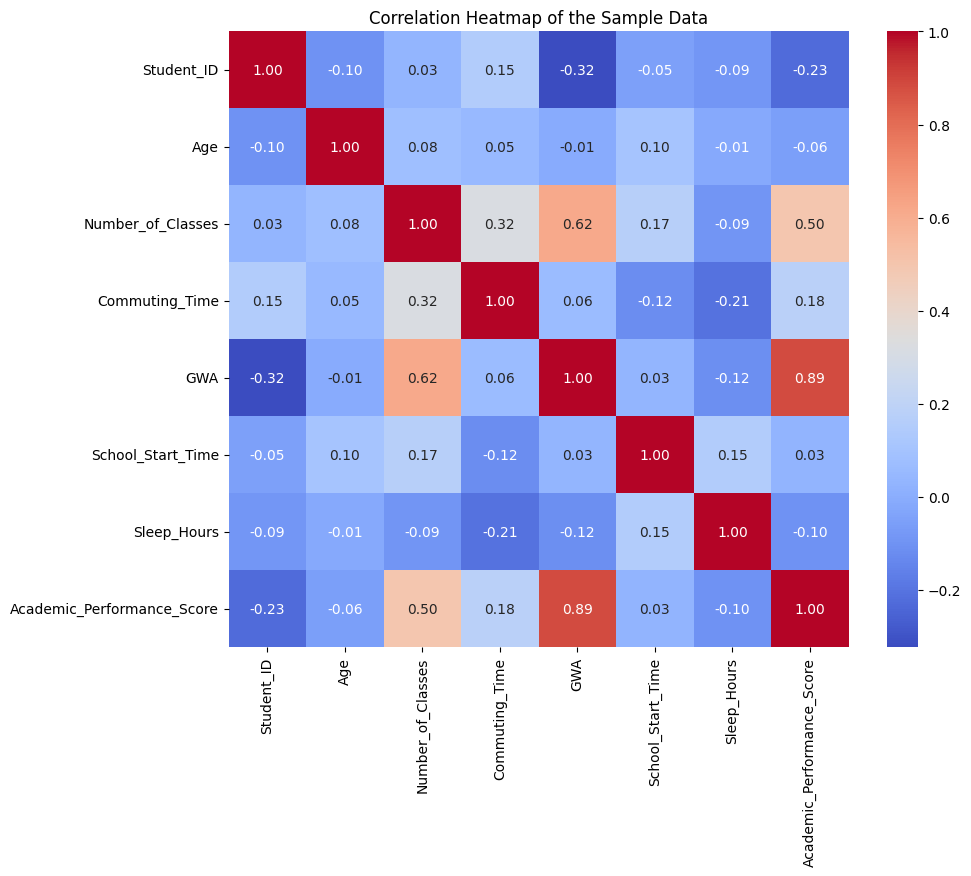

In [5]:
# Calculating the correlation matrix
correlation_matrix = data.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of the Sample Data')
plt.show()


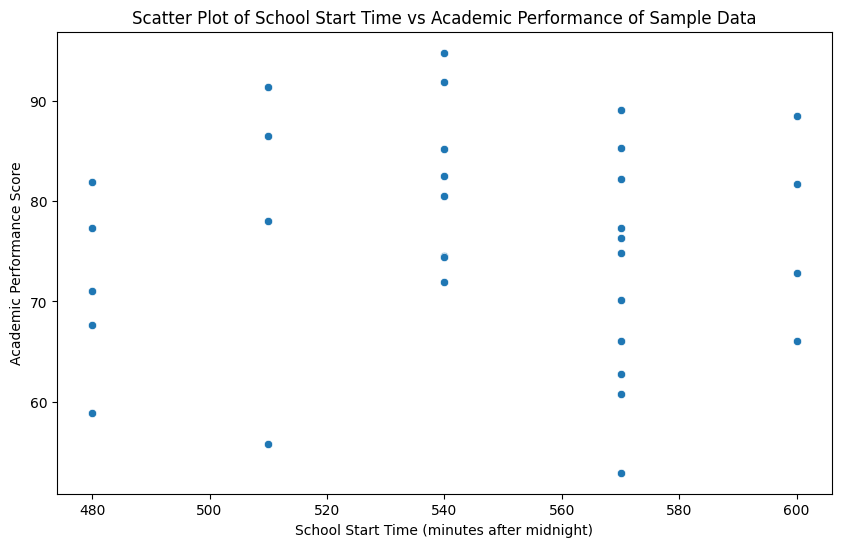

In [6]:
# Plotting the scatter plot of School Start Time vs Academic Performance Score

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['School_Start_Time'], y=data['Academic_Performance_Score'])
plt.title('Scatter Plot of School Start Time vs Academic Performance of Sample Data')
plt.xlabel('School Start Time (minutes after midnight)')
plt.ylabel('Academic Performance Score')
plt.show()


In [7]:


mean_score = data['Academic_Performance_Score'].mean()


median_score = data['Academic_Performance_Score'].median()


std_score = data['Academic_Performance_Score'].std(ddof=1)


mean_median_diff = mean_score - median_score


skewness_computation = 3 * mean_median_diff / std_score


step_by_step = {
    'Mean Score': mean_score,
    'Median Score': median_score,
    'Standard Deviation': std_score,
    'Mean-Median Difference': mean_median_diff,
    'Skewness': skewness_computation
}

step_by_step


{'Mean Score': 75.96625,
 'Median Score': 76.785,
 'Standard Deviation': 10.80428909754019,
 'Mean-Median Difference': -0.8187499999999943,
 'Skewness': -0.22734026994512732}

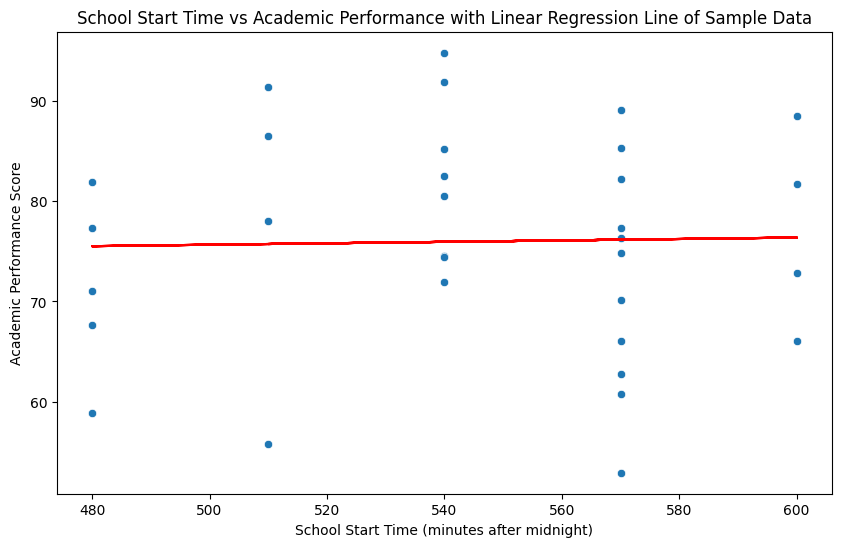

In [8]:
#Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['School_Start_Time'], y=data['Academic_Performance_Score'])


slope, intercept = np.polyfit(data['School_Start_Time'], data['Academic_Performance_Score'], 1)
regression_line = slope * data['School_Start_Time'] + intercept

# Adding the regression line to the plot
plt.plot(data['School_Start_Time'], regression_line, color='red')

plt.title('School Start Time vs Academic Performance with Linear Regression Line of Sample Data')
plt.xlabel('School Start Time (minutes after midnight)')
plt.ylabel('Academic Performance Score')
plt.show()



In [9]:
#Showing the linear regression equation

slope, intercept = np.polyfit(data['School_Start_Time'], data['Academic_Performance_Score'], 1)


print(f"The linear regression equation is: y = {slope:.4f} * x + {intercept:.2f}")

The linear regression equation is: y = 0.0071 * x + 72.08


In [10]:

mean_score = data['Academic_Performance_Score'].mean()
std_score = data['Academic_Performance_Score'].std()

n = len(data['Academic_Performance_Score'])


sem = std_score / (n ** 0.5)


confidence_level = 0.95
z_score = stats.norm.ppf((1 + confidence_level) / 2)
ci_lower = mean_score - z_score * sem
ci_upper = mean_score + z_score * sem

(mean_score, ci_lower, ci_upper)

(75.96625, 72.22282360508488, 79.70967639491512)

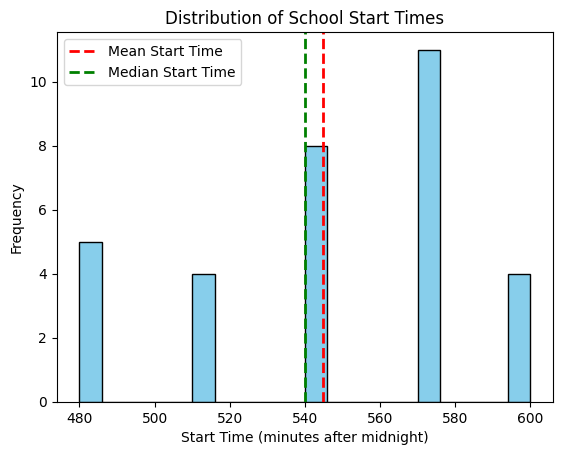

(544.6875, 540.0)

In [11]:
plt.hist(data['School_Start_Time'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of School Start Times')
plt.xlabel('Start Time (minutes after midnight)')
plt.ylabel('Frequency')
plt.axvline(data['School_Start_Time'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean Start Time')
plt.axvline(data['School_Start_Time'].median(), color='green', linestyle='dashed', linewidth=2, label='Median Start Time')
plt.legend()
plt.show()

# Also calculating the mean and median
mean_start_time = data['School_Start_Time'].mean()
median_start_time = data['School_Start_Time'].median()

mean_start_time, median_start_time

In [12]:
# Split the dataset into two groups: before 9 AM and after 9 AM
before_9_am = data[data['School_Start_Time'] < 540]  # 540 minutes is 9 AM
after_9_am = data[data['School_Start_Time'] >= 540]

# Calculate the mean academic performance for both groups
mean_before_9_am = before_9_am['Academic_Performance_Score'].mean()
mean_after_9_am = after_9_am['Academic_Performance_Score'].mean()

mean_before_9_am, mean_after_9_am

(74.27, 76.63)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9fd4be2e-dfa0-4ea1-b17e-927904ab46d5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>